In [3]:
import numpy as np #working with arrays
import scipy as sp #numerical algorithms
import pandas as pd #data frames stuff
import matplotlib #plotting
import sklearn; #machine learning algorithms
import requests; #data from web
import networkx as nx #working with networks
import bs4 #working with html
import seaborn #library for visualization

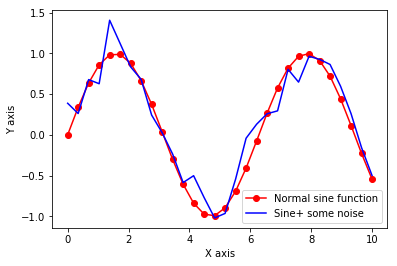

In [8]:
#for inline plots
%matplotlib inline 
import matplotlib.pyplot as plt

x = np.linspace(0,10,30)  #array of 30 points from 0 to 10
y = np.sin(x) #sine function
z = y+ np.random.normal(size=30)*.2 #adding noise to the output
plt.plot(x,y,'ro-',label = "Normal sine function")
plt.plot(x,z,'b-',label = "Sine+ some noise")
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")


In [14]:
x = np.random.random((3,4)) #generates a 3*4 column array of random numbers
print x  

[[ 0.05221274  0.42717921  0.3295821   0.23158628]
 [ 0.46958759  0.68585659  0.04217326  0.38737713]
 [ 0.28919299  0.01184879  0.97267792  0.33785505]]


In [17]:
print x.max() 
print x.min() 
print x.mean() 

0.972677916023
0.0118487913715
0.353094137141


In [18]:
x.max(axis=1) #row wise

array([ 0.42717921,  0.68585659,  0.97267792])

In [20]:
x = np.random.binomial(500,0.5)

(array([   6.,   18.,   35.,   76.,   83.,  130.,   79.,   39.,   23.,   11.]),
 array([ 218. ,  224.2,  230.4,  236.6,  242.8,  249. ,  255.2,  261.4,
         267.6,  273.8,  280. ]),
 <a list of 10 Patch objects>)

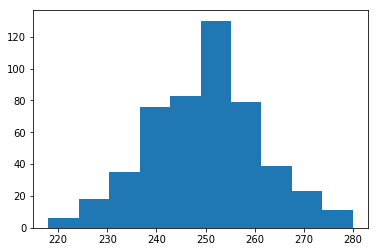

In [34]:
y = [];

[y.append(np.random.binomial(500,0.5)) for i in range(500)]
plt.hist(y)

In [38]:
#monty hall problem
# In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

In [140]:
#simulating prize door
def simulate_prizedoor(nsim):
    random_array = np.random.randint(low=0,high=3,size=nsim)
    return list(random_array)

In [141]:
simulate_prizedoor(10) #test

[0, 1, 2, 2, 1, 0, 2, 1, 2, 2]

In [142]:
#simulating guess random strategy
def simulate_guess(nsim):
    guess = []
    for i in range(nsim):
            guess.append(i%3)
    return guess

In [143]:
simulate_guess(10) #test

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0]

In [144]:
import random
#revealed door simulation
def goat_door(prizedoors,guesslist):
    open_door = []
    for i in range(len(prizedoors)):
        selectList = [0,1,2]  
        if guesslist[i]==prizedoors[i]:
            selectList.remove(guesslist[i])
        else:
            selectList.remove(guesslist[i])
            selectList.remove(prizedoors[i])
        open_door.append(random.choice(selectList))
    return open_door

In [145]:
#test
prizedoors = simulate_prizedoor(10)
guesslists = simulate_guess(10)
print prizedoors
print guesslists
print goat_door(prizedoors,guesslists)

[2, 1, 1, 2, 0, 2, 0, 2, 1, 2]
[0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
[1, 2, 0, 1, 2, 0, 2, 0, 0, 1]


In [148]:
def switch_guess(guessList,opendoor):
    choice = []
    for i in range(len(guessList)):
        new_choice = list(range(3))
        new_choice.remove(guessList[i])
        new_choice.remove(opendoor[i])
        choice.append(new_choice[0])
    return choice

        

In [149]:
prizedoors = simulate_prizedoor(10)
guesslists = simulate_guess(10)
opendoor = goat_door(prizedoors,guesslists)
print guesslists
print opendoor
print switch_guess(guesslists,opendoor)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
[1, 0, 0, 1, 0, 0, 2, 0, 1, 1]
[2, 2, 1, 2, 2, 1, 1, 2, 0, 2]


In [150]:
#determining win percentage
def win_perentage(guesslist,prizelist):
    match = 0
    for i in range(len(guesslist)):
        match+=(guesslist[i]==prizelist[i])
    return (match/(len(guesslist)*1.0))
    

In [151]:
prizedoors = simulate_prizedoor(10000)
guesslists = simulate_guess(10000)
print win_perentage(guesslists,prizedoors)

0.3299


In [163]:
prizedoors = simulate_prizedoor(10000)
guesslists = simulate_guess(10000)
opendoor = goat_door(prizedoors,guesslists)
newguess = switch_guess(guesslists,opendoor)
print win_perentage(guesslists,prizedoors)
print win_perentage(newguess,prizedoors)

0.3349
0.6651
